In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from datetime import timedelta

In [18]:
# Membaca data
datacustomer = pd.read_csv("/Users/dwiyulianto/Downloads/Case Study - Customer.csv", delimiter=';')
datastore = pd.read_csv("/Users/dwiyulianto/Downloads/Case Study - Store.csv", delimiter=';')
dataproduct = pd.read_csv("/Users/dwiyulianto/Downloads/Case Study - Product.csv", delimiter=';')
datatransaction = pd.read_csv("/Users/dwiyulianto/Downloads/Case Study - Transaction.csv", delimiter=';')


In [19]:
# Data Customer Section
# Handle duplicates if necessary
datacustomer_cleaned = datacustomer.drop_duplicates()
datacustomer_cleaned = datacustomer.dropna(axis=0)

# Validate the results
print(datacustomer_cleaned.head())
print(datacustomer_cleaned.shape)

datacustomer_cleaned.isnull().sum()

   CustomerID  Age  Gender Marital Status Income
0           1   55       1        Married   5,12
1           2   60       1        Married   6,23
2           3   32       1        Married   9,17
3           4   31       1        Married   4,87
4           5   58       1        Married   3,57
(444, 5)


CustomerID        0
Age               0
Gender            0
Marital Status    0
Income            0
dtype: int64

In [20]:
# Data Product Section
# Handle duplicates if necessary
dataproduct_cleaned = dataproduct.drop_duplicates()

# Validate the results
print(dataproduct_cleaned.head())
print(dataproduct_cleaned.shape)

dataproduct_cleaned.isnull().sum()

  ProductID   Product Name  Price
0        P1      Choco Bar   8800
1        P2  Ginger Candy    3200
2        P3       Crackers   7500
3        P4    Potato Chip  12000
4        P5       Thai Tea   4200
(10, 3)


ProductID       0
Product Name    0
Price           0
dtype: int64

In [21]:
# Data Store Section
# Identify and handle missing values
datastore_cleaned = datastore.dropna()

# Handle duplicates if necessary
datastore_cleaned = datastore_cleaned.drop_duplicates()

# Validate the results
print(datastore_cleaned.head())
print(datastore_cleaned.shape)

datastore_cleaned.isnull().sum()

   StoreID         StoreName GroupStore           Type   Latitude   Longitude
0        1     Prima Tendean      Prima   Modern Trade       -6,2  106,816666
1        2  Prima Kelapa Dua      Prima   Modern Trade  -6,914864  107,608238
2        3        Prima Kota      Prima   Modern Trade  -7,797068  110,370529
3        4       Gita Ginara       Gita  General Trade  -6,966667  110,416664
4        5           Bonafid       Gita  General Trade  -7,250445  112,768845
(14, 6)


StoreID       0
StoreName     0
GroupStore    0
Type          0
Latitude      0
Longitude     0
dtype: int64

In [22]:
# Data Transaction Section

# Identify and handle missing values
datatransaction_cleaned = datatransaction.dropna()

# Handle duplicates if necessary
datatransaction_cleaned = datatransaction_cleaned.drop_duplicates()

#Mengubah tipe data supaya sesuai
datatransaction_cleaned['Date'] = pd.to_datetime(datatransaction_cleaned['Date'])

# Validate the results
print(datatransaction_cleaned.head())
print(datatransaction_cleaned.shape)

datatransaction_cleaned.isnull().sum()

  TransactionID  CustomerID       Date ProductID  Price  Qty  TotalAmount  \
0       TR11369         328 2022-01-01        P3   7500    4        30000   
1       TR16356         165 2022-01-01        P9  10000    7        70000   
2        TR1984         183 2022-01-01        P1   8800    4        35200   
3       TR35256         160 2022-01-01        P1   8800    7        61600   
4       TR41231         386 2022-01-01        P9  10000    1        10000   

   StoreID  
0       12  
1        1  
2        4  
3        4  
4        4  
(5020, 8)


/var/folders/1l/kv66r7nn0bz1j7vtljz00d400000gp/T/ipykernel_3335/752883293.py:10: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  datatransaction_cleaned['Date'] = pd.to_datetime(datatransaction_cleaned['Date'])


TransactionID    0
CustomerID       0
Date             0
ProductID        0
Price            0
Qty              0
TotalAmount      0
StoreID          0
dtype: int64

In [23]:
#Mengubah tipe data yang belum sesuai
datatransaction_cleaned['Date'] = pd.to_datetime(datatransaction_cleaned['Date'])

In [8]:
datacustomer_cleaned.info()
datatransaction_cleaned.info()
datastore_cleaned.info()
dataproduct_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 444 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      444 non-null    int64 
 1   Age             444 non-null    int64 
 2   Gender          444 non-null    int64 
 3   Marital Status  444 non-null    object
 4   Income          444 non-null    object
dtypes: int64(3), object(2)
memory usage: 20.8+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   TransactionID  5020 non-null   object        
 1   CustomerID     5020 non-null   int64         
 2   Date           5020 non-null   datetime64[ns]
 3   ProductID      5020 non-null   object        
 4   Price          5020 non-null   int64         
 5   Qty            5020 non-null   int64         
 6   TotalAmount    502

In [24]:
#Menggabungkan data pertama
merged_data = pd.merge(datatransaction_cleaned, datacustomer_cleaned, on='CustomerID')

In [25]:
merged_data_final = pd.merge(merged_data, dataproduct_cleaned, on='ProductID')

In [26]:
merged_data_final

,TransactionID,CustomerID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,Product Name,Price_y
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,36,0,Married,"10,53",Crackers,7500
1,TR20170,165,2022-07-23,P3,7500,2,15000,13,44,1,Married,"14,58",Crackers,7500
2,TR80016,183,2022-01-24,P3,7500,2,15000,10,27,1,Single,"0,18",Crackers,7500
3,TR89318,183,2022-07-17,P3,7500,1,7500,12,27,1,Single,"0,18",Crackers,7500
4,TR82094,183,2022-09-15,P3,7500,2,15000,1,27,1,Single,"0,18",Crackers,7500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4971,TR56886,317,2022-12-13,P4,12000,1,12000,11,55,0,Married,"13,89",Potato Chip,12000
4972,TR19361,348,2022-05-29,P4,12000,3,36000,7,29,1,Married,"4,64",Potato Chip,12000
4973,TR35558,192,2022-12-09,P4,12000,2,24000,10,26,0,Single,"4,47",Potato Chip,12000
4974,TR27321,441,2022-11-08,P4,12000,2,24000,10,19,0,Single,"2,66",Potato Chip,12000


In [27]:
transaksiharian = merged_data_final.groupby('Date')['Qty'].sum().reset_index()

In [28]:
transaksiharian

,Date,Qty
0,2022-01-01,49
1,2022-01-02,50
2,2022-01-03,76
3,2022-01-04,98
4,2022-01-05,67
...,...,...
360,2022-12-27,70
361,2022-12-28,68
362,2022-12-29,42
363,2022-12-30,40


In [29]:
# Build and train the ARIMA model
model = ARIMA(transaksiharian['Qty'], order=(2, 1, 2))
model_fit = model.fit()

In [30]:
# Generate predictions
predictions = model_fit.predict(start=transaksiharian.index[0], end=transaksiharian.index[-1])

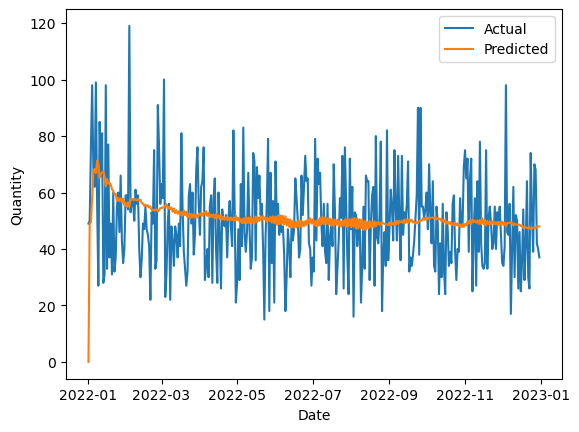

In [31]:
# Plot the actual vs predicted values
plt.plot(transaksiharian['Date'], transaksiharian['Qty'], label='Actual')
plt.plot(transaksiharian['Date'], predictions, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.show()

In [32]:
predictions

0       0.000000
1      48.985962
2      49.481632
3      58.024885
4      67.890110
         ...    
360    47.531383
361    47.409655
362    48.075657
363    47.975770
364    48.001053
Name: predicted_mean, Length: 365, dtype: float64